## **Distance from 1 point to each point in a set.**
The Euclidean distance from $\textbf{z}$ to a point $\textbf{x}_i$ is determined by:

$$||\textbf{z} - \textbf{x}_i||^2_2 = (\textbf{z} - \textbf{x}_i)^T(\textbf{z} - \textbf{x}_i) = ||\textbf{z}||^2_2 + ||\textbf{x}_i||^2_2 - 2\textbf{x}_i^T\textbf{z}$$

In [ ]:
import numpy as np
from time import time # for comparing runing time

d, N = 1000, 10000
X = np.random.randn(N, d)
z = np.random.randn(d)

# naively compute square distance between two vector
def dist_pp(z, x):
  return np.sum((z - x.reshape(z.shape))**2) # force x and z to have the same dims

# from one point to each point in a set, naive
def dist_ps_naive(z, X):
  n = X.shape[0]
  res = np.zeros((1, n))
  for i in range(n):
      res[0][i] = dist_pp(z, X[i])
  return res

# from one point to each point in a set, fast
def dist_ps_fast(z, X):
  return np.sum(z * z) + np.sum(X * X, axis=1) - 2 * X.dot(z) # square of l2 norm of each ROW of X

t1 = time()
D1 = dist_ps_naive(z, X)
print('naive point2set, running time:', time() - t1, 's')

t2 = time()
D2 = dist_ps_fast(z, X)
print('fast point2set, running time:', time() - t2, 's')

print('Result difference:', np.linalg.norm(D1 - D2))

naive point2set, running time: 0.30562925338745117 s
fast point2set, running time: 0.0224456787109375 s
Result difference: 2.0941843782674875e-11


## **Distance from one set to each point in a set.**

In [ ]:
M = 100
Z = np.random.randn(M, d)


# from each point in one set to each point in another set, half fast
def dist_ps_0(Z, X):
  m = Z.shape[0]
  n = X.shape[0]
  res = np.zeros((m, n))

  for i in range(m):
    res[i] = dist_ps_fast(Z[i], X)

  return res

def dist_ss_fast(Z, X):
  return np.sum(Z * Z, axis=1) + np.sum(X * X, axis=1) - 2 * X.dot(Z)

t3 = time()
D3 = dist_ps_naive(z, X)
print('half fast set2set running time:, running time:', time() - t3, 's')

t4 = time()
D4 = dist_ps_fast(z, X)
print('fast set2set running time:, running time:', time() - t4, 's')

print('Result difference:', np.linalg.norm(D3 - D4))

half fast set2set running time:, running time: 0.06214761734008789 s
fast set2set running time:, running time: 0.022176742553710938 s
Result difference: 2.0941843782674875e-11


In Python, we can use `cdist` function in [`scipy.spatial.distance`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cdist.html), or `pairwise_distances` in [`sklearn.metrics.pairwise`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise_distances.html). Below is an example:

In [ ]:
from scipy.spatial import distance
from sklearn.metrics.pairwise import pairwise_distances

print('Distance set2set calculation based on `scipy.spatial`:', distance.cdist(Z, X, 'euclidean'), sep='\n')
print('Distance set2set calculation based on `sklearn.metrics.pairwise`:', pairwise_distances(Z, X, metric='euclidean'), sep='\n')

Distance set2set calculation based on `scipy.spatial`:
[[46.16819641 44.68727476 44.78652344 ... 45.72168832 45.6452633
  43.97120254]
 [46.39846781 45.00307156 43.67105381 ... 46.27493299 47.18773361
  45.53292271]
 [46.35837835 45.96538256 44.10231121 ... 44.88510818 45.55053125
  44.72155463]
 ...
 [46.61681496 45.01106352 45.15272077 ... 45.68933076 44.8825928
  44.68565443]
 [44.63183085 44.12342559 41.47187808 ... 43.30019201 43.74416318
  44.62187907]
 [44.2790319  43.77896231 45.15785453 ... 45.13922144 44.09171293
  44.35418949]]
Distance set2set calculation based on `sklearn.metrics.pairwise`:
[[46.16819641 44.68727476 44.78652344 ... 45.72168832 45.6452633
  43.97120254]
 [46.39846781 45.00307156 43.67105381 ... 46.27493299 47.18773361
  45.53292271]
 [46.35837835 45.96538256 44.10231121 ... 44.88510818 45.55053125
  44.72155463]
 ...
 [46.61681496 45.01106352 45.15272077 ... 45.68933076 44.8825928
  44.68565443]
 [44.63183085 44.12342559 41.47187808 ... 43.30019201 43.74416

## **Example of Iris.**

In [ ]:
import numpy as np
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

np.random.seed(7)
iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target
print('Labels:', np.unique(iris_y))

# Split train and test
X_train, X_test, y_train, y_test = train_test_split(iris_X, iris_y, test_size=130, random_state=7)

Labels: [0 1 2]


In [ ]:
# 1NN
model = neighbors.KNeighborsClassifier(n_neighbors=1, p=2)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy of 1NN: %.2f %%" %(100 * accuracy_score(y_test, y_pred)))

Accuracy of 1NN: 92.31 %


In [ ]:
# 7NN
model = neighbors.KNeighborsClassifier(n_neighbors=7, p=2)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy of 7NN with major voting: %.2f %%" %(100 * accuracy_score(y_test, y_pred)))

Accuracy of 7NN with major voting: 93.85 %


Evaluating neighboring point weights `weights='distance'` (`weights` defaults to `uniform`) means that a point closer to the test point should have a higher weight. This technique avoids the unfairness between closer and farther points as they are given equal weight when calculating the distance to the test point.

In [ ]:
model = neighbors.KNeighborsClassifier(n_neighbors=7, p=2, weights='distance')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy of 7NN (1/distance weights): %.2f %%" %(100 * accuracy_score(y_test, y_pred)))

Accuracy of 7NN (1/distance weights): 94.62 %


Define your own KNN weights, for example a commonly used weighting method:

$$w_i = \exp\left(\frac{-||\textbf{z} - \textbf{x}_i||_2^2}{\sigma^2}\right)$$

Where $w_i$ is the weight of the $i^{\text{th}}$ closest point of the considered data point $\textbf{z}$, $\sigma$ is a positive number. This function satisfies the above conditions.

In [ ]:
def myWeight(distances):
  sigma2 = .4 # we can change this number
  return np.exp(-distances**2 / sigma2)

model = neighbors.KNeighborsClassifier(n_neighbors=7, p=2, weights=myWeight)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy of 7NN (customized weights): %.2f %%" %(100 * accuracy_score(y_test, y_pred)))

Accuracy of 7NN (customized weights): 95.38 %


***Another example:*** `weights='distance'` tends to cause overfitting.

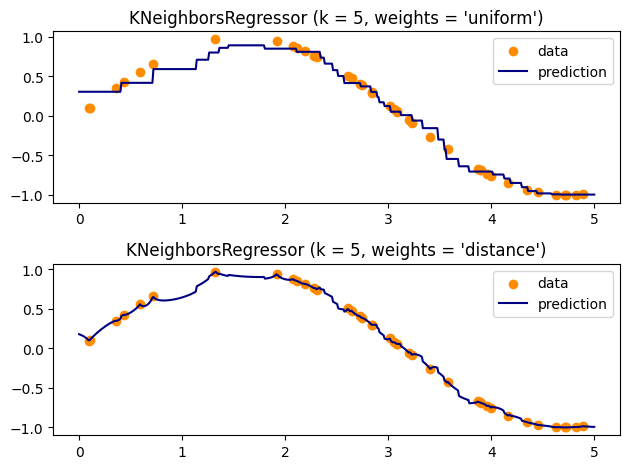

In [ ]:
import matplotlib.pyplot as plt

np.random.seed(0)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel() # numpy.ravel() is used to change a 2-dimensional array or a multi-dimensional array into a contiguous flattened array
X_test = np.linspace(0, 5, 500).reshape(-1, 1)

n_neighbors = 5

for i, weights in enumerate(["uniform", "distance"]):
    knn = neighbors.KNeighborsRegressor(n_neighbors=n_neighbors, p=2, weights=weights)
    y_pred = knn.fit(X, y).predict(X_test)

    plt.subplot(2, 1, i + 1)
    plt.scatter(X, y, color="darkorange", label="data")
    plt.plot(X_test, y_pred, color="navy", label="prediction")
    plt.axis("tight")
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors, weights))

plt.tight_layout()

___
## **References:**

$[1].$ *Vũ Hữu Tiệp. Machine Learning cơ bản, Chapter 9, 2018.*

$[2].$ Source code for this part can be found here: [KNN in $[1]$](https://github.com/tiepvupsu/ebookML_src/blob/master/src/knn/KNN.ipynb) and [Nearest Neighbors regression of `scikit learn`](https://scikit-learn.org/stable/auto_examples/neighbors/plot_regression.html#sphx-glr-auto-examples-neighbors-plot-regression-py).